# Ratio of Uniforms simulation

If $A = \{(u,v):0\leq u \leq \sqrt{f(\frac{v}{u})}\}$, and $(U,V)$ is a uniform random vector over $A$, then $\frac{V}{U}$ has density $f$

We need a bound on $A$, so that we can use a rejection algorithm. Conditions:

$f(x)$ bounded, $x^2f(x)$ bounded are sufficient.

for $N(0,1)$,

$f(x) <= 1$, $x^2f(x) <= \sqrt{2/e}$

In [2]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as rnd
import pandas as pd

pd.set_option('mode.use_inf_as_na', True)

/var/folders/nx/66n_n3m52673_p592jgpkjjm0000gn/T/ipykernel_79682/731005947.py:8: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)


In [11]:
num_iter = 1_000_000_00

a = np.sqrt(2/np.e)*(2*np.pi)**(-1/4)
b = np.sqrt(1/np.sqrt(2*np.pi))

u = rnd.uniform(low=0,high=b,size=num_iter)
v = rnd.uniform(low=-a,high=+a,size=num_iter)
x = v/u

sample = x[u**2 <= 1/np.sqrt(2*np.pi) * np.exp(-0.5*x**2)]

In [8]:
sample.shape

(730158,)

# Brownian Motion

finite simulation of brownian motion at times $t_1, \dots, t_n$, we just need to simulate $n$ normal random variables with mean 0, variance $t_i - t_{i-1}$

In [3]:
num_iter = 100

n = 5
times = np.concatenate([np.zeros(1),rnd.uniform(low=0,high=1,size=n-1),[1]])
times.sort()

times = np.linspace(0,n,n+1)
variances = times[1:] - times[0:-1]

a = np.sqrt((n+1)*variances) * (2*np.pi*np.prod(variances))**(-1/(2*(n+1)))*np.e**(-1/2)
b = ((2*np.pi)**(-n/2) * np.prod(variances)**(-1/2))**(1/(n+1))

u = rnd.uniform(low=0,high=b,size=num_iter)
v = rnd.uniform(low=-a,high=+a,size=(num_iter,n))
x = v/np.tile(u,(n,1)).transpose()

sample = x[u**(n+1) <= (2*np.pi*np.prod(variances))**(-1/2)*np.exp(-(1/2)*np.sum(x**2/variances,axis=1))]

sample.shape

(5, 5)

/opt/miniconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

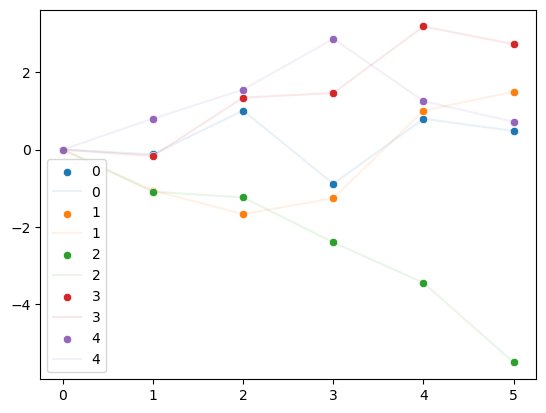

In [4]:
fig,ax = plt.subplots()

for i, s in enumerate(np.concatenate([np.zeros(shape=(sample.shape[0],1)),sample.cumsum(axis=1)],axis=1)[:20]):
    sns.scatterplot(x=times,y=s,label=i,ax=ax)
    sns.lineplot(x=times,y=s,label=i,ax=ax,alpha=0.1)